# Final project COGS 118B


## Part 1: Data


In [1]:
#from google.colab import files
import io
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing 
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
import pygal
from pygal.style import Style

ModuleNotFoundError: ignored

In [2]:
# Upload data
#uploaded = files.upload()

In [3]:
# Convert the data into Pandas dataframe
#df = pd.read_csv(io.BytesIO(uploaded['Country-data.csv']))
df = pd.read_csv ('Country-data.csv')
df.head()
# Dataset is now stored in a Pandas Dataframe

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Part 2: K-means clustering

### 2.1 Without scaling the features

In [4]:
# Convert the data into numpy array
dfArray = df.to_numpy()

In [5]:
# Look at data
dfArray.shape # data shape 167x10
dfArray[0:,:] # columns are: Name, child_mort, exports, health, imports, income, inflation, life_expec, total_fer, gdpp.

array([['Afghanistan', 90.2, 10.0, ..., 56.2, 5.82, 553],
       ['Albania', 16.6, 28.0, ..., 76.3, 1.65, 4090],
       ['Algeria', 27.3, 38.4, ..., 76.5, 2.89, 4460],
       ...,
       ['Vietnam', 23.3, 72.0, ..., 73.1, 1.95, 1310],
       ['Yemen', 56.3, 30.0, ..., 67.5, 4.67, 1310],
       ['Zambia', 83.1, 37.0, ..., 52.0, 5.4, 1460]], dtype=object)

In [65]:
# Remove first column with the country names 
dfArray_Values = dfArray[:,1:]

In [66]:
# Convert datapoints to float 
dfArray_Values = np.array(list(dfArray_Values), dtype=float)

In [67]:
def calcSqDistances(X, Kmus):
  sqDist = ((-2 * X.dot(Kmus.T) + np.sum(np.multiply(Kmus,Kmus), axis = 1).T).T + np.sum(np.multiply(X,X), axis = 1)).T
  return sqDist

In [9]:
def determineRnk(sqDmat):
    m = np.argmin(sqDmat, axis = 1)
    Rnk = np.eye(sqDmat.shape[1])[m]
    return Rnk

In [10]:
def recalcMus(X, Rnk):
    N,D = X.shape 
    Kmus_new = (np.divide(X.T.dot(Rnk),np.sum(Rnk,axis = 0))).T
    
    return Kmus_new

In [11]:
def runKMeans(K, data):
    X = data
    N, D = X.shape

    #allocate space for the K mu vectors
    Kmus = np.zeros((K, D))

    #initialize cluster centers by randomly picking points from the data
    rand_inds = np.random.permutation(N)
    Kmus = X[rand_inds[0:K],:]

    #specify the maximum number of iterations to allow
    maxiters = 1000

    for iter in range(maxiters):
        sqDmat = calcSqDistances(X, Kmus)
        Rnk = determineRnk(sqDmat)
        KmusOld = Kmus
        
        Kmus = recalcMus(X, Rnk)
        if np.sum(np.abs(KmusOld.reshape((-1, 1)) - Kmus.reshape((-1, 1)))) < 1e-12:
            print('Number of iterations running K-means: ', iter)
            break

    return Rnk

In [31]:
# Create a list of list
def createListofList(cluster_locations):
  tempList = []

  for i in range(np.size(cluster_locations, axis = 1)):
      tempList.append([])

  return tempList

In [32]:
# Get a list of cluster with each element being a cluster list
def getClusters(cluster_locations, dfArray):
    
    cluster_Lists = createListofList(cluster_locations)
    
    for i in range(len(dfArray[:,0])):
      for j in range(np.size(cluster_locations, axis = 1)):
        if cluster_locations[i,j] == 1:
          cluster_Lists[j].append(dfArray[i,0])

    return cluster_Lists

In [33]:
def displayCluster(string,cluster_locations, dfArray, file_name_svg): # WORLD MAP FUNCTION
    countries_ab = pd.read_csv('countries_ab.csv')
   # countries_ab
    countries_ab_new = countries_ab.to_numpy()
    cluster_Lists = getClusters(cluster_locations, dfArray)

    # THESE ARE THE CHARACTER CODES FOR EACH CLUSTER NAMES
    cluster_new = createListofList(cluster_locations)

#print(countries_ab_new[:,0])

    # THESE ARE THE CHARACTER CODES FOR EACH CLUSTER NAMES
    cluster_new = []
# Iterate over a sequence of numbers from 0 to 4
    for i in range(np.size(cluster_locations,axis =1)):
    # In each iteration, add an empty list to the main list
        cluster_new.append([])

    for i in range(len(countries_ab_new[:,0])):
        for j in range(np.size(cluster_locations, axis = 1)):
            if countries_ab_new[i,1] in cluster_Lists[j]:
                cluster_new[j].append(countries_ab_new[i,0])

    #create a Style object
    custom_style = Style( colors = ('#FF0000' , '#0000FF' ,'#00FF00' , '#000000'))

    # the custom colours in the map,
    worldmap = pygal.maps.world.World(style = custom_style)

    # set the title of the map
    worldmap.title = string

    for i in range(np.size(cluster_locations, axis = 1)):
        worldmap.add('Cluster: %i'%(i + 1) , cluster_new[i]) # CHARACTER CODES FROM BEFORE

    # save into the file
    worldmap.render_to_file(file_name_svg)

    print("Success")

Number of iterations running K-means:  9
Success


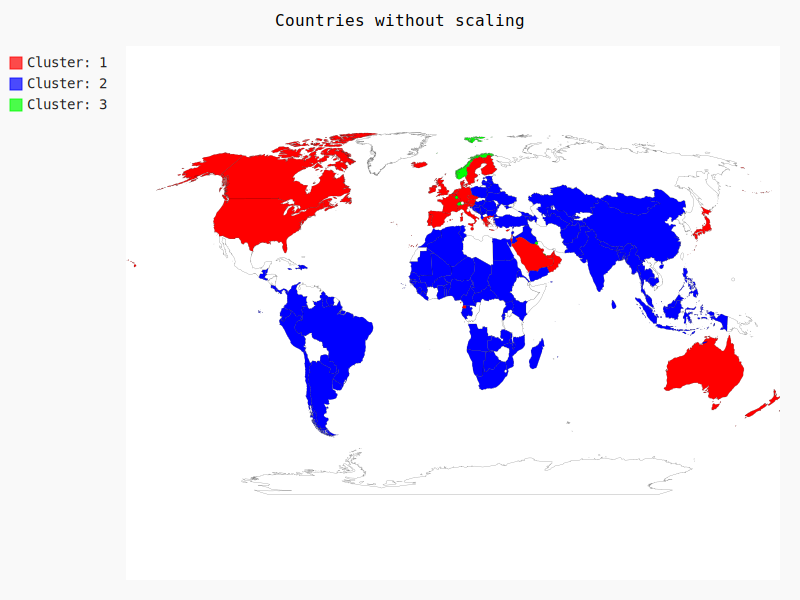

In [80]:
cluster_locations = runKMeans(3, dfArray_Values)

displayCluster("Countries without scaling",cluster_locations, dfArray,'countries_without_scaling.svg' )
from IPython.core.display import SVG
SVG(filename='countries_without_scaling.svg')

![NOT_SCALED_NEW.png](attachment:NOT_SCALED_NEW.png)

### 2.2 With scaling

In [38]:
# We drop the labels in the pandas dataframe too
df2 = df.drop('country', axis=1)
df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [39]:
# Standard scale the data to avoid features with large values having large impact
# numpy array
dfArray_Normal = preprocessing.scale(df2)

# Transforming normalized data into panda dataframe: Used for plotting
# panda dataframe
df_Normalized = pd.DataFrame(dfArray_Normal,columns= df2.columns)


Number of iterations running K-means:  4
Success


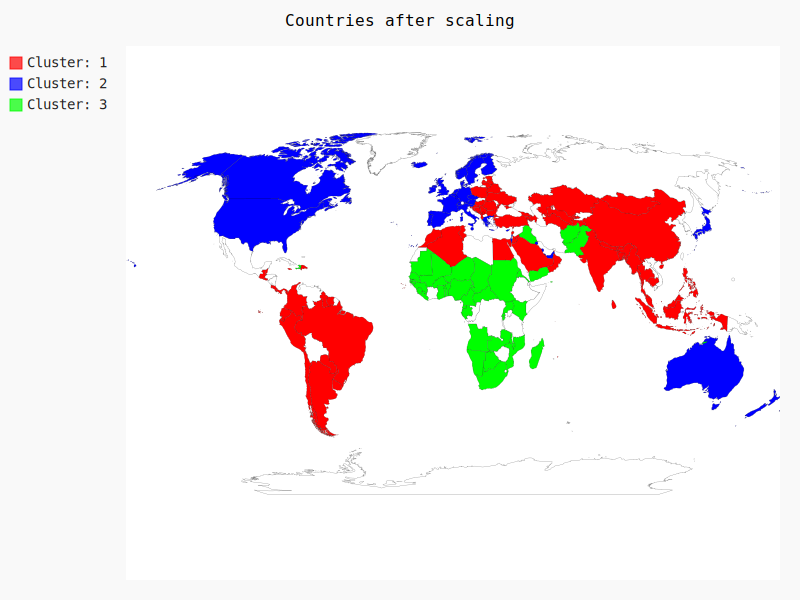

In [74]:
# Run K-means on scaled data
cluster_LocNormal = runKMeans(3, dfArray_Normal)
displayCluster("Countries after scaling",cluster_LocNormal, dfArray, 'countries_after_scaling.svg')
from IPython.core.display import SVG
SVG(filename='countries_after_scaling.svg')

![SCALED_NEW.png](attachment:SCALED_NEW.png)

In [76]:
# Get an array with the cluster locations

def getClusterIndex(cluster_LocNormal):
  # Create empty matrix 
  n,k = cluster_LocNormal.shape
  cluster_index = np.zeros((n), dtype = np.int32)

  # Create cluster matrix 
  for i in range(len(cluster_LocNormal)):
    for cluster in range(k):
      if cluster_LocNormal[i,cluster] == 1:
        cluster_index[i]=cluster

  return cluster_index

In [77]:
# Create empty matrix 
cluster_IndNormal = getClusterIndex(cluster_LocNormal)

In [78]:
# Add cluster column
df_Normalized['clusters']= cluster_IndNormal + 1

[Text(0.5, 1.0, 'Clustering by Income and GDPP')]

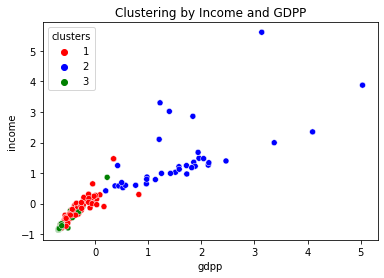

In [79]:
# Plot
# after scaling
# clustering by income and gdpp
sns.scatterplot(x= 'gdpp', y='income', hue='clusters', 
                data=df_Normalized, palette=['red','blue','green']).set(title='Clustering by Income and GDPP')

[Text(0.5, 1.0, 'Clustering by Health and GDPP')]

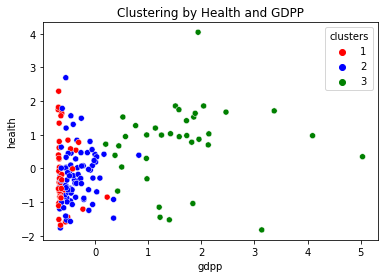

In [59]:
# Clustering by health and gdpp
sns.scatterplot(x= 'gdpp', y='health', hue='clusters', 
                data=df_Normalized, palette=['red','blue','green']).set(title='Clustering by Health and GDPP')

[Text(0.5, 1.0, 'Clustering by Inflation and GDPP')]

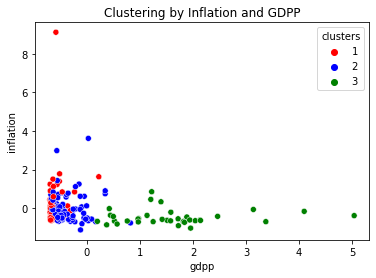

In [60]:
# clustering by inflation and gdpp
sns.scatterplot(x= 'gdpp', y='inflation', hue='clusters', 
                data=df_Normalized, palette=['red','blue','green']).set(title='Clustering by Inflation and GDPP')

[Text(0.5, 1.0, 'Clustering by Exports and Imports')]

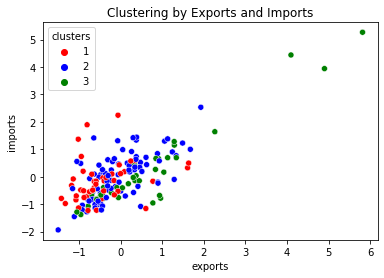

In [61]:
# Clustering by exports and imports
sns.scatterplot(x= 'exports', y='imports', hue='clusters', 
                data=df_Normalized, palette=['red','blue','green']).set(title='Clustering by Exports and Imports')

[Text(0.5, 1.0, 'Clustering by Life Expectancy and Health')]

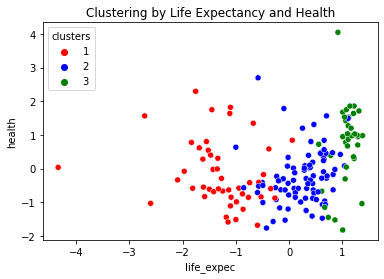

In [70]:
# Clustering by by life expectancy and health
sns.scatterplot(x= 'life_expec', y='health', hue='clusters', 
                data=df_Normalized, palette=['red','blue','green']).set(title='Clustering by Life Expectancy and Health')

## Part C: PCA

### Number of dimensions needed

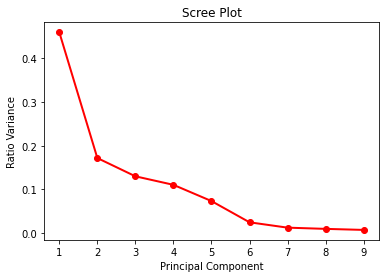

In [68]:
# Using scaled data for PCA
pca=PCA(n_components=9).fit(dfArray_Normal)
PC_values = np.arange(pca.n_components) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Ratio Variance')
plt.show()

### PCA to reduce dimensions

Number of iterations running K-means:  7
Success


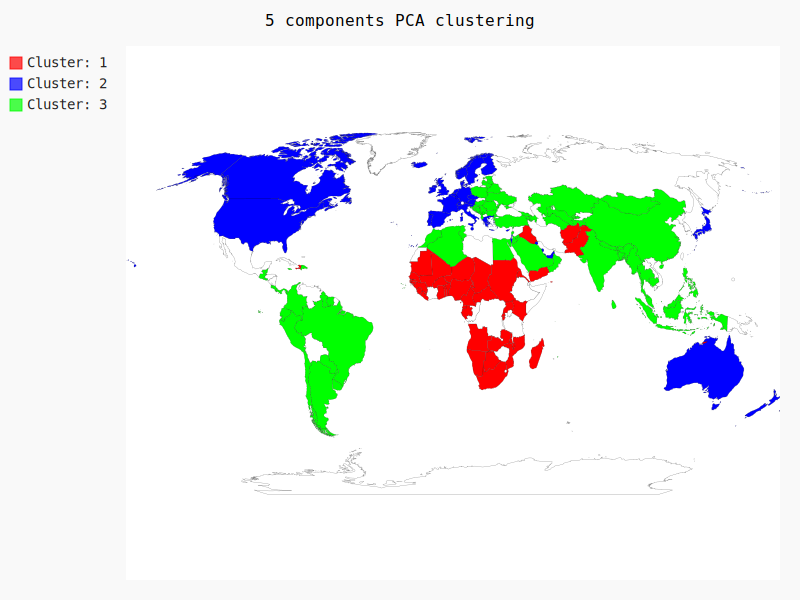

In [29]:
# Run PCA -> reduces dimensions
pca = PCA(n_components = 5)

principalComp = pca.fit_transform(dfArray_Normal)
principalDf = pd.DataFrame(data = principalComp)
principalDfNP = principalDf.to_numpy()
cluster_LocPCA = runKMeans(3, principalDfNP)

displayCluster("5 components PCA clustering",cluster_LocPCA, dfArray, 'PCA_clusters.svg')
from IPython.core.display import SVG
SVG(filename='PCA_clusters.svg')


![PCA_NEW.png](attachment:PCA_NEW.png)